<a href="https://colab.research.google.com/github/Kyawhtin21501/CCC_project/blob/main/data_tra/sale_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
from google.colab import files
uploaded = files.upload()  # 📤 ファイル選択画面が出る


Saving kaggle (1).json to kaggle (1) (8).json


In [423]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the path to the file you'd like to load
file_path = "Balaji Fast Food Sales.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rajatsurana979/fast-food-sales-report",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-931071278.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fast-food-sales-report' dataset.
First 5 records:    order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  


In [424]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [426]:
from dateutil import parser

df['date'] = df['date'].apply(lambda x: parser.parse(x))



In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    893 non-null    object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


In [428]:
from pydoc import replace
df = df.sort_values(by='date')



In [429]:
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
690,691,2022-04-01,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Evening
622,623,2022-04-02,Cold coffee,Beverages,40,15,600,Cash,Mr.,Midnight
571,572,2022-04-02,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon
519,520,2022-04-03,Panipuri,Fastfood,20,11,220,Online,Mrs.,Night
412,413,2022-04-03,Aalopuri,Fastfood,20,10,200,Online,Mrs.,Midnight
393,394,2022-04-03,Sandwich,Fastfood,60,1,60,Cash,Mrs.,Morning
604,605,2022-04-04,Cold coffee,Beverages,40,15,600,NaN,Mrs.,Afternoon
509,510,2022-04-04,Sandwich,Fastfood,60,14,840,Online,Mr.,Afternoon
333,334,2022-04-04,Cold coffee,Beverages,40,4,160,Cash,Mrs.,Evening
905,906,2022-04-04,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon


In [430]:
df.drop(columns=["order_id","item_name","item_type","item_price","quantity","transaction_type"],inplace=True)

In [431]:
df.head()
df.reset_index(drop=True,inplace=True)

In [432]:
df.head()
df.isnull().sum()


,0
date,0
transaction_amount,0
received_by,0
time_of_sale,0


In [433]:
df.drop(columns= ["received_by","time_of_sale"],axis=1,inplace=True)


In [434]:
df.head()

,date,transaction_amount
0,2022-04-01,420
1,2022-04-02,600
2,2022-04-02,900
3,2022-04-03,220
4,2022-04-03,200


In [435]:
grouped_df = df.groupby('date')['transaction_amount'].mean()
grouped_df = pd.DataFrame(grouped_df)




print(grouped_df.head())


            transaction_amount
date                          
2022-04-01               420.0
2022-04-02               750.0
2022-04-03               160.0
2022-04-04               625.0
2022-04-05               100.0


In [436]:
display(grouped_df)

,transaction_amount
date,
2022-04-01,420.000000
2022-04-02,750.000000
2022-04-03,160.000000
2022-04-04,625.000000
2022-04-05,100.000000
...,...
2023-03-25,280.000000
2023-03-26,93.333333
2023-03-27,260.000000


In [437]:
df = grouped_df

In [438]:
df['transaction_amount'] = df["transaction_amount"] * 1.5

In [439]:
df.reset_index(inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                348 non-null    datetime64[ns]
 1   transaction_amount  348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


<Axes: xlabel='date', ylabel='transaction_amount'>

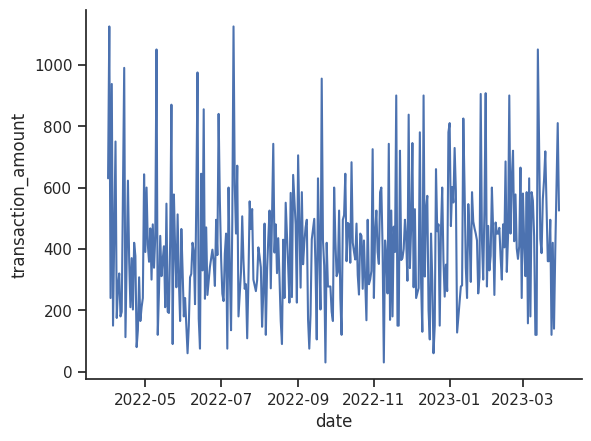

In [440]:
sns.lineplot(data=df,x="date",y="transaction_amount")

In [441]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


df['weekday'] = df['date'].dt.weekday
df["month_day"] = pd.to_datetime(df["date"]).dt.strftime("%m-%d")

df['weekday_name'] = df['date'].dt.day_name()

In [442]:
df.head(10)

,date,transaction_amount,year,month,day,weekday,month_day,weekday_name
0,2022-04-01,630.0,2022,4,1,4,04-01,Friday
1,2022-04-02,1125.0,2022,4,2,5,04-02,Saturday
2,2022-04-03,240.0,2022,4,3,6,04-03,Sunday
3,2022-04-04,937.5,2022,4,4,0,04-04,Monday
4,2022-04-05,150.0,2022,4,5,1,04-05,Tuesday
5,2022-04-07,750.0,2022,4,7,3,04-07,Thursday
6,2022-04-08,175.0,2022,4,8,4,04-08,Friday
7,2022-04-09,277.5,2022,4,9,5,04-09,Saturday
8,2022-04-10,320.0,2022,4,10,6,04-10,Sunday
9,2022-04-11,180.0,2022,4,11,0,04-11,Monday


In [443]:
weekday_day_grouped = df.groupby('weekday_name')['transaction_amount'].mean()
weekday_day_grouped = pd.DataFrame(weekday_day_grouped)
weekday_day_grouped.reset_index(inplace=True)
weekday_day_grouped


,weekday_name,transaction_amount
0,Friday,382.710357
1,Monday,440.873724
2,Saturday,393.088942
3,Sunday,416.287465
4,Thursday,438.990160
5,Tuesday,431.761968
6,Wednesday,378.428929


<Axes: xlabel='weekday_name', ylabel='transaction_amount'>

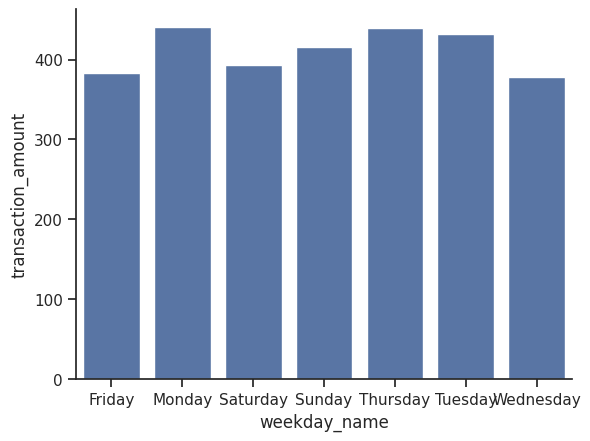

In [444]:


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=weekday_day_grouped['weekday_name'], y=weekday_day_grouped['transaction_amount'])

In [445]:
month_group_df = df.groupby('month')['transaction_amount'].mean()
month_group_df = pd.DataFrame(month_group_df)
month_group_df.reset_index(inplace=True)
month_group_df

,month,transaction_amount
0,1,484.706897
1,2,469.493622
2,3,460.417488
3,4,385.446429
4,5,396.796371
5,6,388.519180
6,7,385.912500
7,8,366.521552
8,9,371.470238
9,10,402.510417


<Axes: xlabel='month', ylabel='transaction_amount'>

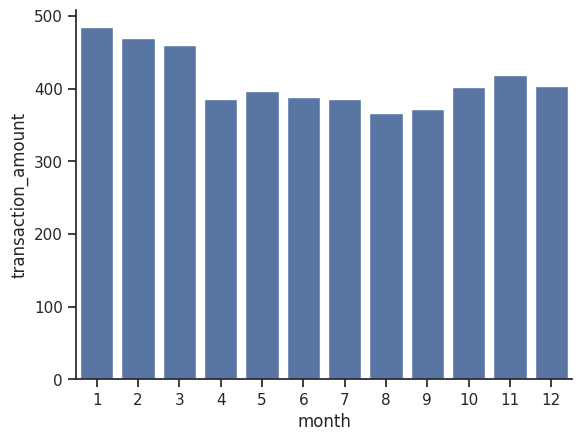

In [446]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(x=month_group_df['month'], y=month_group_df['transaction_amount'])

In [447]:
df.head()

,date,transaction_amount,year,month,day,weekday,month_day,weekday_name
0,2022-04-01,630.0,2022,4,1,4,04-01,Friday
1,2022-04-02,1125.0,2022,4,2,5,04-02,Saturday
2,2022-04-03,240.0,2022,4,3,6,04-03,Sunday
3,2022-04-04,937.5,2022,4,4,0,04-04,Monday
4,2022-04-05,150.0,2022,4,5,1,04-05,Tuesday


In [448]:
df.isnull().sum()

,0
date,0
transaction_amount,0
year,0
month,0
day,0
weekday,0
month_day,0
weekday_name,0


In [449]:
print(df['date'].min())

2022-04-01 00:00:00


In [450]:
print(df['date'].max())

2023-03-30 00:00:00


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                348 non-null    datetime64[ns]
 1   transaction_amount  348 non-null    float64       
 2   year                348 non-null    int32         
 3   month               348 non-null    int32         
 4   day                 348 non-null    int32         
 5   weekday             348 non-null    int32         
 6   month_day           348 non-null    object        
 7   weekday_name        348 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(4), object(2)
memory usage: 16.4+ KB


In [452]:
!pip install openmeteo-requests requests-cache retry-requests pandas

import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://historical-forecast-api.open-meteo.com/v1/forecast"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2022-04-01",
	"end_date": "2023-03-30",
	"daily": ["temperature_2m_max", "temperature_2m_min", "weather_code", "precipitation_probability_max", "snowfall_sum", "rain_sum"],
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
daily_weather_code = daily.Variables(2).ValuesAsNumpy()
daily_precipitation_probability_max = daily.Variables(3).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(4).ValuesAsNumpy()
daily_rain_sum = daily.Variables(5).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end =  pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["weather_code"] = daily_weather_code
daily_data["precipitation_probability_max"] = daily_precipitation_probability_max
daily_data["snowfall_sum"] = daily_snowfall_sum
daily_data["rain_sum"] = daily_rain_sum

daily_dataframe = pd.DataFrame(data = daily_data)
print("\nDaily data\n", daily_dataframe)

Coordinates: 52.52000045776367°N 13.419998168945312°E
Elevation: 38.0 m asl
Timezone difference to GMT+0: 0s

Daily data
                          date  temperature_2m_max  temperature_2m_min  \
0   2022-04-01 00:00:00+00:00            7.308500              0.9085   
1   2022-04-02 00:00:00+00:00            6.608500             -1.1915   
2   2022-04-03 00:00:00+00:00            7.208500             -1.8915   
3   2022-04-04 00:00:00+00:00            8.108500              1.3085   
4   2022-04-05 00:00:00+00:00            8.708500              5.0085   
..                        ...                 ...                 ...   
359 2023-03-26 00:00:00+00:00           10.395500              4.2955   
360 2023-03-27 00:00:00+00:00            6.145500              1.1955   
361 2023-03-28 00:00:00+00:00            7.045500             -0.0045   
362 2023-03-29 00:00:00+00:00           10.695499              0.6955   
363 2023-03-30 00:00:00+00:00           18.095499              7.4955   

 

In [453]:
daily_dataframe.head()

,date,temperature_2m_max,temperature_2m_min,weather_code,precipitation_probability_max,snowfall_sum,rain_sum
0,2022-04-01 00:00:00+00:00,7.3085,0.9085,3.0,NaN,0.00,0.0
1,2022-04-02 00:00:00+00:00,6.6085,-1.1915,3.0,NaN,0.00,0.0
2,2022-04-03 00:00:00+00:00,7.2085,-1.8915,51.0,NaN,0.00,0.0
3,2022-04-04 00:00:00+00:00,8.1085,1.3085,71.0,NaN,0.28,7.0
4,2022-04-05 00:00:00+00:00,8.7085,5.0085,53.0,NaN,0.00,2.4


In [454]:
weather_df = daily_dataframe.copy()

In [455]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   date                           364 non-null    datetime64[ns, UTC]
 1   temperature_2m_max             364 non-null    float32            
 2   temperature_2m_min             364 non-null    float32            
 3   weather_code                   364 non-null    float32            
 4   precipitation_probability_max  0 non-null      float32            
 5   snowfall_sum                   364 non-null    float32            
 6   rain_sum                       364 non-null    float32            
dtypes: datetime64[ns, UTC](1), float32(6)
memory usage: 11.5 KB


In [456]:
weather_df['date'] = weather_df['date'].dt.strftime('%Y-%m-%d')

In [457]:
weather_df.head()

,date,temperature_2m_max,temperature_2m_min,weather_code,precipitation_probability_max,snowfall_sum,rain_sum
0,2022-04-01,7.3085,0.9085,3.0,NaN,0.00,0.0
1,2022-04-02,6.6085,-1.1915,3.0,NaN,0.00,0.0
2,2022-04-03,7.2085,-1.8915,51.0,NaN,0.00,0.0
3,2022-04-04,8.1085,1.3085,71.0,NaN,0.28,7.0
4,2022-04-05,8.7085,5.0085,53.0,NaN,0.00,2.4


In [458]:
weather_df["date"] = pd.to_datetime(weather_df["date"])

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                348 non-null    datetime64[ns]
 1   transaction_amount  348 non-null    float64       
 2   year                348 non-null    int32         
 3   month               348 non-null    int32         
 4   day                 348 non-null    int32         
 5   weekday             348 non-null    int32         
 6   month_day           348 non-null    object        
 7   weekday_name        348 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(4), object(2)
memory usage: 16.4+ KB


In [460]:
df = pd.merge(df, weather_df, on='date', how='left')

In [461]:
df.head()

,date,transaction_amount,year,month,day,weekday,month_day,weekday_name,temperature_2m_max,temperature_2m_min,weather_code,precipitation_probability_max,snowfall_sum,rain_sum
0,2022-04-01,630.0,2022,4,1,4,04-01,Friday,7.3085,0.9085,3.0,NaN,0.00,0.0
1,2022-04-02,1125.0,2022,4,2,5,04-02,Saturday,6.6085,-1.1915,3.0,NaN,0.00,0.0
2,2022-04-03,240.0,2022,4,3,6,04-03,Sunday,7.2085,-1.8915,51.0,NaN,0.00,0.0
3,2022-04-04,937.5,2022,4,4,0,04-04,Monday,8.1085,1.3085,71.0,NaN,0.28,7.0
4,2022-04-05,150.0,2022,4,5,1,04-05,Tuesday,8.7085,5.0085,53.0,NaN,0.00,2.4


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           348 non-null    datetime64[ns]
 1   transaction_amount             348 non-null    float64       
 2   year                           348 non-null    int32         
 3   month                          348 non-null    int32         
 4   day                            348 non-null    int32         
 5   weekday                        348 non-null    int32         
 6   month_day                      348 non-null    object        
 7   weekday_name                   348 non-null    object        
 8   temperature_2m_max             348 non-null    float32       
 9   temperature_2m_min             348 non-null    float32       
 10  weather_code                   348 non-null    float32       
 11  precipitation_proba

In [463]:
del df["precipitation_probability_max"]


In [464]:
df.head()

,date,transaction_amount,year,month,day,weekday,month_day,weekday_name,temperature_2m_max,temperature_2m_min,weather_code,snowfall_sum,rain_sum
0,2022-04-01,630.0,2022,4,1,4,04-01,Friday,7.3085,0.9085,3.0,0.00,0.0
1,2022-04-02,1125.0,2022,4,2,5,04-02,Saturday,6.6085,-1.1915,3.0,0.00,0.0
2,2022-04-03,240.0,2022,4,3,6,04-03,Sunday,7.2085,-1.8915,51.0,0.00,0.0
3,2022-04-04,937.5,2022,4,4,0,04-04,Monday,8.1085,1.3085,71.0,0.28,7.0
4,2022-04-05,150.0,2022,4,5,1,04-05,Tuesday,8.7085,5.0085,53.0,0.00,2.4


In [465]:
date_df = pd.read_csv("date.csv")

In [466]:
date_df.head()

,2024-01-01,元日
0,2024-01-08,成人の日
1,2024-02-11,建国記念の日
2,2024-02-12,建国記念の日 振替休日
3,2024-02-23,天皇誕生日
4,2024-03-20,春分の日


In [467]:
date_df.rename(columns={"2024-01-01": "date", "元日": "holiday"}, inplace=True)


In [468]:
date_df.head()

date_df["date"] = pd.to_datetime(date_df["date"])
date_df["month_day"] = pd.to_datetime(date_df["date"]).dt.strftime("%m-%d")

In [469]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       57 non-null     datetime64[ns]
 1   holiday    57 non-null     object        
 2   month_day  57 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.5+ KB


In [470]:
df = pd.merge(df, date_df, on= "month_day", how = "left")

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_x              372 non-null    datetime64[ns]
 1   transaction_amount  372 non-null    float64       
 2   year                372 non-null    int32         
 3   month               372 non-null    int32         
 4   day                 372 non-null    int32         
 5   weekday             372 non-null    int32         
 6   month_day           372 non-null    object        
 7   weekday_name        372 non-null    object        
 8   temperature_2m_max  372 non-null    float32       
 9   temperature_2m_min  372 non-null    float32       
 10  weather_code        372 non-null    float32       
 11  snowfall_sum        372 non-null    float32       
 12  rain_sum            372 non-null    float32       
 13  date_y              53 non-null     datetime64[ns]

In [472]:
df.head()

,date_x,transaction_amount,year,month,day,weekday,month_day,weekday_name,temperature_2m_max,temperature_2m_min,weather_code,snowfall_sum,rain_sum,date_y,holiday
0,2022-04-01,630.0,2022,4,1,4,04-01,Friday,7.3085,0.9085,3.0,0.00,0.0,NaT,NaN
1,2022-04-02,1125.0,2022,4,2,5,04-02,Saturday,6.6085,-1.1915,3.0,0.00,0.0,NaT,NaN
2,2022-04-03,240.0,2022,4,3,6,04-03,Sunday,7.2085,-1.8915,51.0,0.00,0.0,NaT,NaN
3,2022-04-04,937.5,2022,4,4,0,04-04,Monday,8.1085,1.3085,71.0,0.28,7.0,NaT,NaN
4,2022-04-05,150.0,2022,4,5,1,04-05,Tuesday,8.7085,5.0085,53.0,0.00,2.4,NaT,NaN


In [473]:
holiday = df["holiday"].unique()
print(holiday)

[nan '昭和の日' '憲法記念日' 'みどりの日' 'こどもの日' 'こどもの日 振替休日' 'みどりの日 振替休日' '憲法記念日 振替休日'
 '海の日' '休日 山の日' '敬老の日' '秋分の日' '国民の休日' '秋分の日 振替休日' 'スポーツの日' '文化の日'
 '文化の日 振替休日' '勤労感謝の日' '勤労感謝の日 振替休日' '元日' '成人の日' '建国記念の日' '建国記念の日 振替休日'
 '天皇誕生日' '天皇誕生日 振替休日' '春分の日']


In [474]:
df["holiday"].fillna(0,inplace=True)

/tmp/ipython-input-3825660296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["holiday"].fillna(0,inplace=True)


In [475]:
df.loc[df['holiday'] != 0, 'holiday'] = 1


In [476]:
hol = df["holiday"].unique()
print(hol)

[0 1]


In [477]:
df["week_of_year"] = df['date_x'].dt.isocalendar().week

In [478]:
df.drop(columns=["date_y"],inplace=True)

In [479]:
df.head()

,date_x,transaction_amount,year,month,day,weekday,month_day,weekday_name,temperature_2m_max,temperature_2m_min,weather_code,snowfall_sum,rain_sum,holiday,week_of_year
0,2022-04-01,630.0,2022,4,1,4,04-01,Friday,7.3085,0.9085,3.0,0.00,0.0,0,13
1,2022-04-02,1125.0,2022,4,2,5,04-02,Saturday,6.6085,-1.1915,3.0,0.00,0.0,0,13
2,2022-04-03,240.0,2022,4,3,6,04-03,Sunday,7.2085,-1.8915,51.0,0.00,0.0,0,13
3,2022-04-04,937.5,2022,4,4,0,04-04,Monday,8.1085,1.3085,71.0,0.28,7.0,0,14
4,2022-04-05,150.0,2022,4,5,1,04-05,Tuesday,8.7085,5.0085,53.0,0.00,2.4,0,14


In [480]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'   # 冬
    elif month in [3, 4, 5]:
        return 'Spring'   # 春
    elif month in [6, 7, 8]:
        return 'Summer'   # 夏
    else:
        return 'Autumn'   # 秋

df["season"] = df['month'].apply(get_season)

In [481]:
df.head()

,date_x,transaction_amount,year,month,day,weekday,month_day,weekday_name,temperature_2m_max,temperature_2m_min,weather_code,snowfall_sum,rain_sum,holiday,week_of_year,season
0,2022-04-01,630.0,2022,4,1,4,04-01,Friday,7.3085,0.9085,3.0,0.00,0.0,0,13,Spring
1,2022-04-02,1125.0,2022,4,2,5,04-02,Saturday,6.6085,-1.1915,3.0,0.00,0.0,0,13,Spring
2,2022-04-03,240.0,2022,4,3,6,04-03,Sunday,7.2085,-1.8915,51.0,0.00,0.0,0,13,Spring
3,2022-04-04,937.5,2022,4,4,0,04-04,Monday,8.1085,1.3085,71.0,0.28,7.0,0,14,Spring
4,2022-04-05,150.0,2022,4,5,1,04-05,Tuesday,8.7085,5.0085,53.0,0.00,2.4,0,14,Spring


In [482]:
def get_festival(sale):
    if sale >= 1000:
      return 1
    else:
      return 0

In [483]:
df["festival"]  = df["transaction_amount"].apply(get_festival)

In [484]:
df.describe()

,date_x,transaction_amount,year,month,day,weekday,temperature_2m_max,temperature_2m_min,weather_code,snowfall_sum,rain_sum,week_of_year,festival
count,372,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.0,372.000000
mean,2022-09-29 14:58:03.870967808,410.404954,2022.250000,6.478495,15.534946,3.040323,15.230824,7.964793,39.201614,0.033495,0.819355,26.362903,0.010753
min,2022-04-01 00:00:00,30.000000,2022.000000,1.000000,1.000000,0.000000,-4.104500,-9.804501,1.000000,0.000000,0.000000,1.0,0.000000
25%,2022-06-27 18:00:00,273.437500,2022.000000,3.750000,8.000000,1.000000,7.770500,2.445500,3.000000,0.000000,0.000000,13.0,0.000000
50%,2022-10-01 12:00:00,390.000000,2022.000000,6.000000,16.000000,3.000000,15.976999,8.508500,51.000000,0.000000,0.000000,26.0,0.000000
75%,2022-12-31 06:00:00,525.000000,2022.250000,10.000000,23.000000,5.000000,21.608500,12.733500,61.000000,0.000000,0.325000,40.0,0.000000
max,2023-03-30 00:00:00,1125.000000,2023.000000,12.000000,31.000000,6.000000,37.408497,23.608500,96.000000,3.920000,17.799999,52.0,1.000000
std,NaN,203.562001,0.433596,3.459752,8.827876,1.975862,8.961958,6.783723,31.237114,0.234085,2.165088,15.065894,0.103275


In [485]:
df.rename(columns={"date_x": "date","transaction_amount" : "sales"},inplace=True)

In [486]:
df["sales"] = df["sales"].apply(lambda x: x * 195)

In [487]:
df.head()

,date,sales,year,month,day,weekday,month_day,weekday_name,temperature_2m_max,temperature_2m_min,weather_code,snowfall_sum,rain_sum,holiday,week_of_year,season,festival
0,2022-04-01,122850.0,2022,4,1,4,04-01,Friday,7.3085,0.9085,3.0,0.00,0.0,0,13,Spring,0
1,2022-04-02,219375.0,2022,4,2,5,04-02,Saturday,6.6085,-1.1915,3.0,0.00,0.0,0,13,Spring,1
2,2022-04-03,46800.0,2022,4,3,6,04-03,Sunday,7.2085,-1.8915,51.0,0.00,0.0,0,13,Spring,0
3,2022-04-04,182812.5,2022,4,4,0,04-04,Monday,8.1085,1.3085,71.0,0.28,7.0,0,14,Spring,0
4,2022-04-05,29250.0,2022,4,5,1,04-05,Tuesday,8.7085,5.0085,53.0,0.00,2.4,0,14,Spring,0
